In [1]:
import sys
sys.path.append('../')

import Dataset_load
from gammapy.modeling.models import Models
from gammapy.modeling import Parameter
import astropy.units as u


In [2]:
c = Dataset_load.load_config()
awo, aw, ewo, ew = c['_colors']  
livetime = c['livetime']
c

{'bias': 0.0,
 'case': 'wecap',
 'colors': [[[0.8901960784313725, 0.10196078431372549, 0.10980392156862745],
   [0.984313725490196, 0.6039215686274509, 0.6]],
  [[0.12156862745098039, 0.47058823529411764, 0.7058823529411765],
   [0.6509803921568628, 0.807843137254902, 0.8901960784313725]],
  [[1.0, 0.4980392156862745, 0.0],
   [0.9921568627450981, 0.7490196078431373, 0.43529411764705883]],
  [[0.41568627450980394, 0.23921568627450981, 0.6039215686274509],
   [0.792156862745098, 0.6980392156862745, 0.8392156862745098]]],
 'corrlength': 2,
 'figformat': 'pdf',
 'livetime': 2.154434690031884,
 'livetimes': [0.01,
  0.021544346900318832,
  0.046415888336127774,
  0.1,
  0.21544346900318834,
  0.46415888336127775,
  1.0,
  2.154434690031884,
  4.641588833612778,
  10.0,
  21.544346900318832,
  46.41588833612777,
  100.0],
 'local': {'path': '/home/katrin/Documents',
  'path_pksflare': '/home/katrin/Documents/nuisance_summary/PKS_flare'},
 'magnitude': 10,
 'model': 'crab_cutoff',
 'norm': 0

In [3]:
amplitude= Parameter('amplitude', value = 3.85e-12, unit=u.Unit("1 / (TeV s cm2)"))
dataset_input_point  = Dataset_load.create_asimov(model = c['model'], source = c['source'], 
                                               livetime = f"{livetime}-hr",
                                        parameters = [amplitude],
                                           spatial_model =None)

loaded dataset:
/home/wecapstor1/caph/mppi045h/nuisance_summary/PKS_flare/HESS_public/dataset-simulated-2.154434690031884-hr.fits.gz


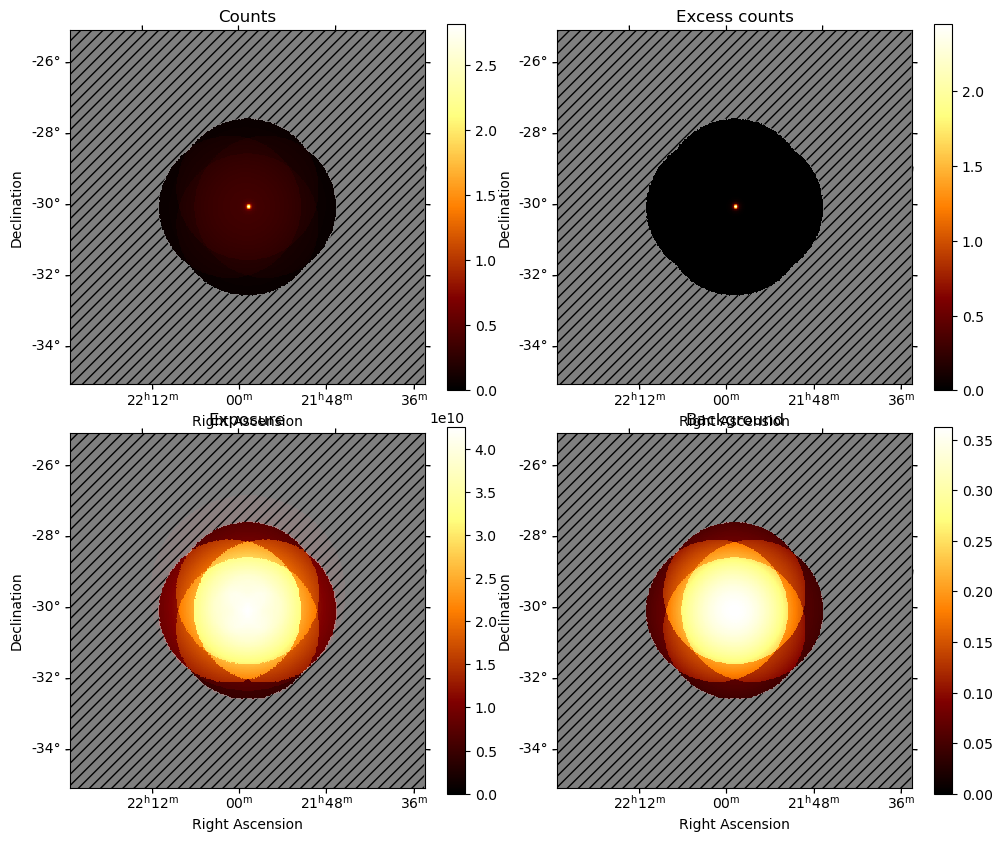

In [4]:
dataset_input_point.peek()

In [5]:
c_msh = c.copy()
c_msh['source'] = "MSH"
c_msh['model']

'crab_cutoff'

In [18]:
amplitude= Parameter('amplitude', value = 3.85e-10, unit=u.Unit("1 / (TeV s cm2)"))
dataset_input_point_msh  = Dataset_load.create_asimov(model = c_msh['model'], source = c_msh['source'], 
                                               livetime = f"{livetime}-hr",
                                        parameters = [amplitude],
                                           spatial_model =None)

from gammapy.modeling.models import GaussianSpatialModel,SkyModel, PowerLawSpectralModel, PointSpatialModel
gaussian = GaussianSpatialModel(lon_0 = dataset_input_point_msh._geom.center_skydir.ra,
                                lat_0 = dataset_input_point_msh._geom.center_skydir.dec,
                                sigma = 0.3 *u.deg
                               )

dataset_input  = Dataset_load.create_asimov(model = c_msh['model'], source = c_msh['source'], 
                                               livetime = f"{livetime}-hr",
                                        parameters = [amplitude],
                                           spatial_model =gaussian)

Position <SkyCoord (ICRS): (ra, dec) in deg
    (329.68, -30.22166667)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (ICRS): (ra, dec) in deg
    (329.68, -30.22166667)> is outside valid IRF map range, using nearest IRF defined within


loaded dataset:
/home/wecapstor1/caph/mppi045h/nuisance_summary/PKS_flare/HESS_public/dataset-MSH-simulated-2.154434690031884-hr.fits.gz
loaded dataset:
/home/wecapstor1/caph/mppi045h/nuisance_summary/PKS_flare/HESS_public/dataset-MSH-simulated-2.154434690031884-hr.fits.gz


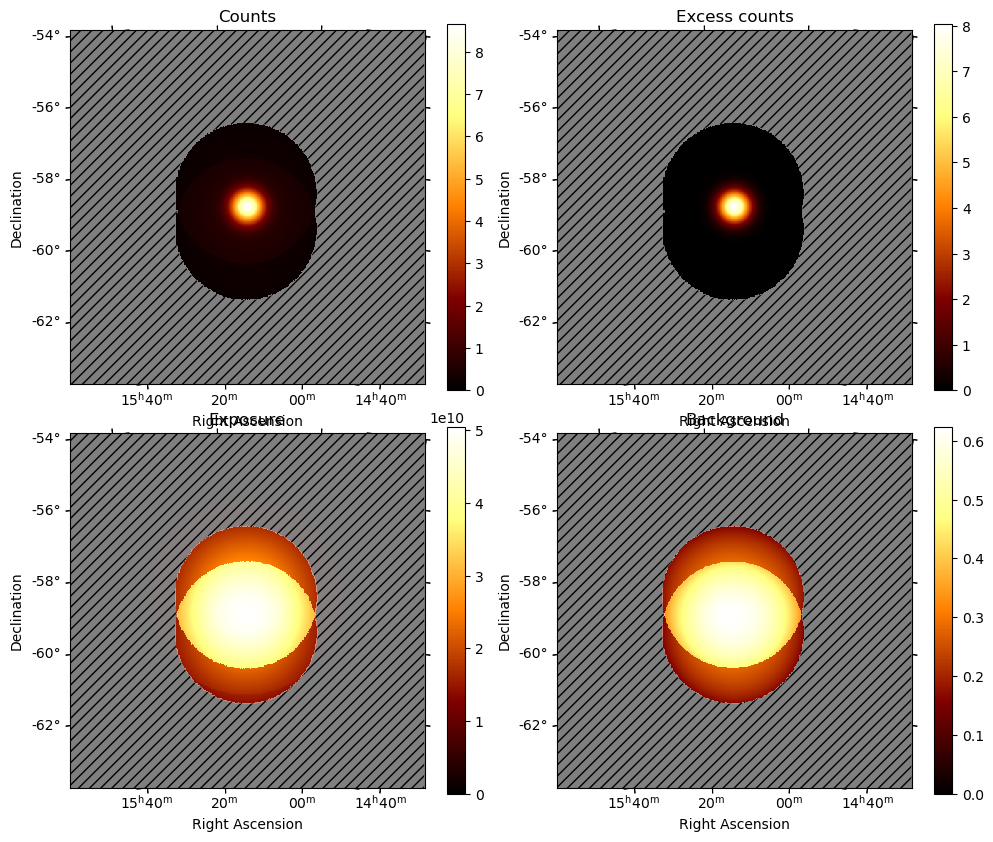

In [19]:
dataset_input.peek()

shift 1.0


(<WCSAxes: >,
 <Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='Residuals (data - model)'>)

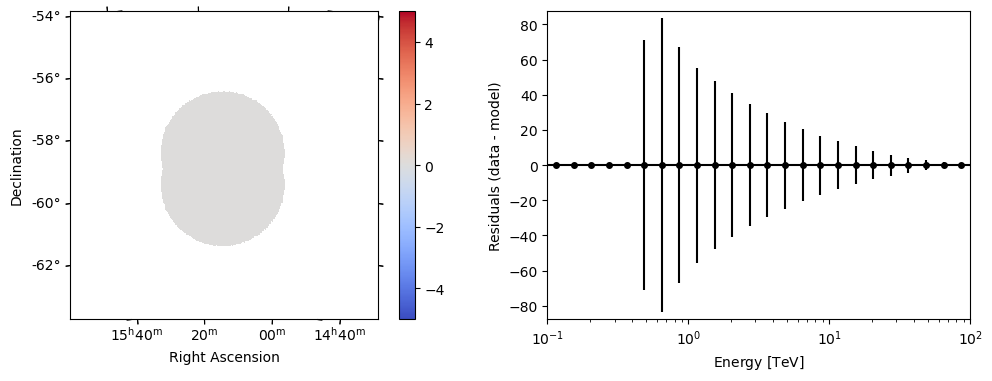

In [20]:
dataset_input.plot_residuals()